# Neural Network - Fully-connected

In [72]:
%matplotlib inline
import os
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# import RenewAI
sys.path.append('/Users/tmorales/tmp/RNN-windPower/src')
from pre_process.split_ml_ts import dataframe_split

import numpy as np

In [2]:
exp_path = '/Users/tmorales/tmp/experiments/NREL/Offshore_WA_OR/turbine_25915'
experiment_name = 'nn-fully-connect-one-hidden'
directory = os.path.join(exp_path, experiment_name)
if not os.path.exists(directory):
    os.makedirs(directory)

## Load file

In [3]:
path = '/Users/tmorales/tmp/RNN-windPower/database/wind_farms/Offshore_WA_OR/Offshore_WA_OR_features'

In [4]:
os.chdir(path)
files = [file for file in glob.glob('Offshore_WA_OR_features_*.csv')]
files

['Offshore_WA_OR_features_h_01.csv',
 'Offshore_WA_OR_features_h_02.csv',
 'Offshore_WA_OR_features_h_03.csv',
 'Offshore_WA_OR_features_h_04.csv',
 'Offshore_WA_OR_features_h_05.csv',
 'Offshore_WA_OR_features_h_06.csv',
 'Offshore_WA_OR_features_h_07.csv',
 'Offshore_WA_OR_features_h_08.csv',
 'Offshore_WA_OR_features_h_09.csv',
 'Offshore_WA_OR_features_h_10.csv',
 'Offshore_WA_OR_features_h_11.csv',
 'Offshore_WA_OR_features_h_12.csv',
 'Offshore_WA_OR_features_h_13.csv',
 'Offshore_WA_OR_features_h_14.csv',
 'Offshore_WA_OR_features_h_15.csv',
 'Offshore_WA_OR_features_h_16.csv',
 'Offshore_WA_OR_features_h_17.csv',
 'Offshore_WA_OR_features_h_18.csv',
 'Offshore_WA_OR_features_h_19.csv',
 'Offshore_WA_OR_features_h_20.csv',
 'Offshore_WA_OR_features_h_21.csv',
 'Offshore_WA_OR_features_h_22.csv',
 'Offshore_WA_OR_features_h_23.csv',
 'Offshore_WA_OR_features_h_24.csv']

## Paso 1: only one h-step

In [5]:
h1 = files[0]

In [6]:
# create directory for each horizont (each horizon is a regressor)
horizont = 1
directory_by_horizont = os.path.join(exp_path, 
                                     experiment_name,
                                     'model_saved_h={0:03d}'.format(horizont))
if not os.path.exists(directory_by_horizont):
    os.makedirs(directory_by_horizont)

In [7]:
# load file
df_h1 = pd.read_csv(files[0], delimiter=';', index_col=0)
df_h1.head(4)

,f_0,f_1,f_2,f_3,f_4,f_5,target_h1
target_date,,,,,,,
2004-01-01 06:00:00,6.96,5.28,5.32,4.93,4.05,3.95,4.19
2004-01-01 07:00:00,5.28,5.32,4.93,4.05,3.95,4.19,4.89
2004-01-01 08:00:00,5.32,4.93,4.05,3.95,4.19,4.89,5.16
2004-01-01 09:00:00,4.93,4.05,3.95,4.19,4.89,5.16,5.01


In [8]:
# select the best model for h=1

# split the dataset in train, val and test
data = dataframe_split(df_h1)
train_set = data['train_set']
validation_set = data['validation_set']
test_set = data['test_set']

In [9]:
# features and target columns
features_columns = train_set.columns[1:-1]
target_column = train_set.columns[-1:]

In [10]:
# select the values of features and target columns.
features_train_set = train_set[features_columns]
target_train_set = train_set[target_column]
features_validation_set = validation_set[features_columns]
target_validation_set = validation_set[target_column]

In [11]:
# select values
x_train = features_train_set.values; y_train = target_train_set.values
x_val = features_validation_set.values; y_val = target_validation_set.values

In [12]:
print('N of examples: {0}'.format(x_train.shape))

N of examples: (16830, 5)


In [13]:
x_train.max()

22.25

## Paso 2: Model defenition

In [14]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import plot_model

/Users/tmorales/interpreters/anaconda3/envs/p3tf1/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
n_input = 5
neurons = 4
output = 1
lr = 0.001
epochs = 100
batch_size = 1024

In [16]:
# -- topology
inputs = Input(shape = (n_input,), name='input-layer')
batch_normalization = BatchNormalization(name='batch_normalization')(inputs)
hidden = Dense(neurons, activation='relu', name='hidden')(batch_normalization)
output = Dense(output, activation='linear', name='output-layer')(hidden)

model = Model(inputs=inputs, outputs=output)
model.summary()

plot_model(model,
          to_file='mlp-hidden-1.png',
          show_shapes=True,
          show_layer_names=True,
          rankdir='LR')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input-layer (InputLayer)     (None, 5)                 0         
_________________________________________________________________
batch_normalization (BatchNo (None, 5)                 20        
_________________________________________________________________
hidden (Dense)               (None, 4)                 24        
_________________________________________________________________
output-layer (Dense)         (None, 1)                 5         
Total params: 49
Trainable params: 39
Non-trainable params: 10
_________________________________________________________________


In [17]:
# -- compile
opt = Adam(lr = lr)
model.compile(loss='mean_squared_error',
              optimizer = opt,
              metrics = ['mae']) 

In [18]:
# -- fit 
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size = batch_size,
                    validation_data = (x_val, y_val))

Train on 16830 samples, validate on 4208 samples
Epoch 1/100
16830/16830 [==============================] - 0s 29us/step - loss: 45.3528 - mean_absolute_error: 5.8897 - val_loss: 30.6028 - val_mean_absolute_error: 4.8430
Epoch 2/100
16830/16830 [==============================] - 0s 3us/step - loss: 43.5124 - mean_absolute_error: 5.7746 - val_loss: 29.6612 - val_mean_absolute_error: 4.7919
Epoch 3/100
16830/16830 [==============================] - 0s 3us/step - loss: 41.4962 - mean_absolute_error: 5.6439 - val_loss: 28.4487 - val_mean_absolute_error: 4.7124
Epoch 4/100
16830/16830 [==============================] - 0s 4us/step - loss: 39.3989 - mean_absolute_error: 5.5057 - val_loss: 27.1815 - val_mean_absolute_error: 4.6228
Epoch 5/100
16830/16830 [==============================] - 0s 5us/step - loss: 37.2369 - mean_absolute_error: 5.3593 - val_loss: 25.9431 - val_mean_absolute_error: 4.5294
Epoch 6/100
16830/16830 [==============================] - 0s 5us/step - loss: 35.0485 - mean_a

Epoch 49/100
16830/16830 [==============================] - 0s 5us/step - loss: 1.2823 - mean_absolute_error: 0.7816 - val_loss: 1.1943 - val_mean_absolute_error: 0.7533
Epoch 50/100
16830/16830 [==============================] - 0s 3us/step - loss: 1.2541 - mean_absolute_error: 0.7703 - val_loss: 1.1800 - val_mean_absolute_error: 0.7475
Epoch 51/100
16830/16830 [==============================] - 0s 4us/step - loss: 1.2474 - mean_absolute_error: 0.7669 - val_loss: 1.1681 - val_mean_absolute_error: 0.7422
Epoch 52/100
16830/16830 [==============================] - 0s 3us/step - loss: 1.2361 - mean_absolute_error: 0.7621 - val_loss: 1.1575 - val_mean_absolute_error: 0.7374
Epoch 53/100
16830/16830 [==============================] - 0s 3us/step - loss: 1.2192 - mean_absolute_error: 0.7577 - val_loss: 1.1484 - val_mean_absolute_error: 0.7334
Epoch 54/100
16830/16830 [==============================] - 0s 3us/step - loss: 1.2129 - mean_absolute_error: 0.7532 - val_loss: 1.1409 - val_mean_abs

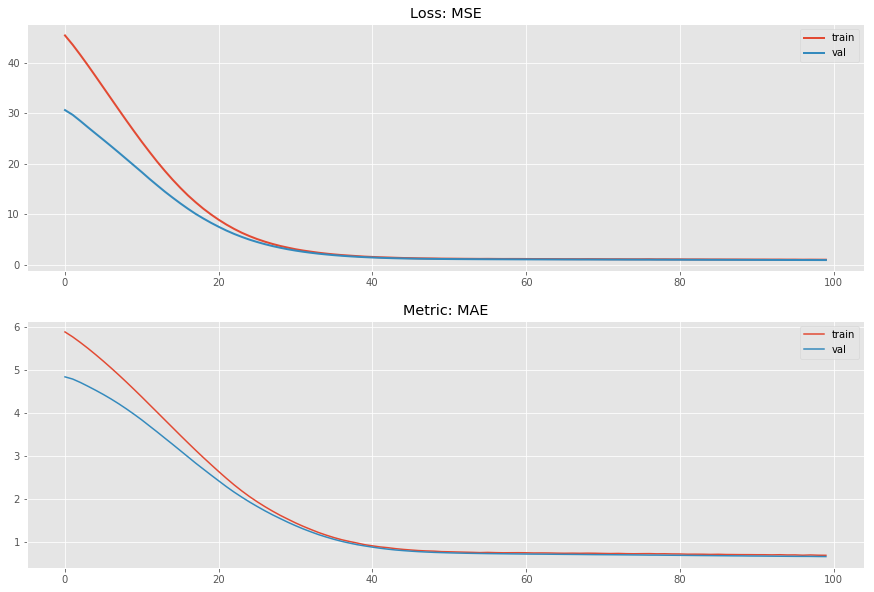

In [19]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(15,10))
ax1.plot(history.history['loss'], lw=2, label='train')
ax1.plot(history.history['val_loss'], lw=2, label='val')
ax1.set_title('Loss: MSE')
ax1.legend()
ax2.plot(history.history['mean_absolute_error'], label='train')
ax2.plot(history.history['val_mean_absolute_error'], label='val')
ax2.set_title('Metric: MAE')
ax2.legend()

## Paso 3: Prediction

In [20]:
x_test = test_set[features_columns].values

In [21]:
predicted = model.predict(x_test)

In [22]:
df_prediction = test_set.copy()
df_prediction.head()

,f_0,f_1,f_2,f_3,f_4,f_5,target_h1
target_date,,,,,,,
2006-05-26 20:00:00,5.30,5.19,5.24,5.27,4.45,3.92,4.19
2006-05-26 21:00:00,5.19,5.24,5.27,4.45,3.92,4.19,4.60
2006-05-26 22:00:00,5.24,5.27,4.45,3.92,4.19,4.60,5.34
2006-05-26 23:00:00,5.27,4.45,3.92,4.19,4.60,5.34,4.70
2006-05-27 00:00:00,4.45,3.92,4.19,4.60,5.34,4.70,3.00


In [23]:
df_prediction['target_predicted'] = predicted
df_prediction.head()

,f_0,f_1,f_2,f_3,f_4,f_5,target_h1,target_predicted
target_date,,,,,,,,
2006-05-26 20:00:00,5.30,5.19,5.24,5.27,4.45,3.92,4.19,3.741346
2006-05-26 21:00:00,5.19,5.24,5.27,4.45,3.92,4.19,4.60,4.337496
2006-05-26 22:00:00,5.24,5.27,4.45,3.92,4.19,4.60,5.34,4.733466
2006-05-26 23:00:00,5.27,4.45,3.92,4.19,4.60,5.34,4.70,5.397212
2006-05-27 00:00:00,4.45,3.92,4.19,4.60,5.34,4.70,3.00,4.840327


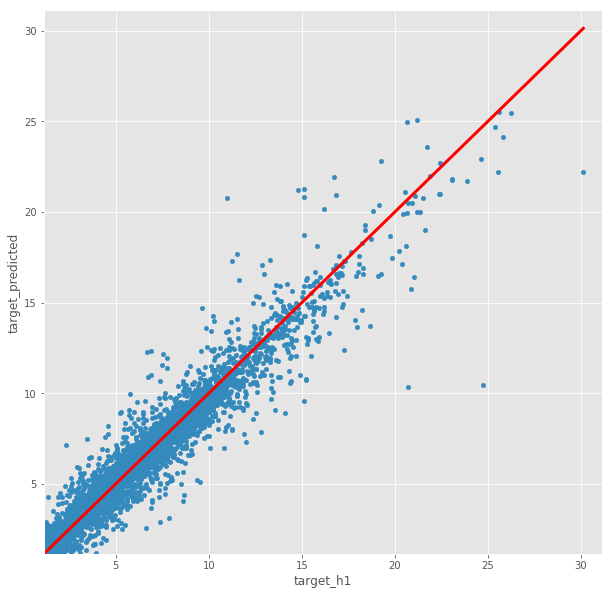

In [68]:
title='MLP-hidden1-5n'

f, ax = plt.subplots(1,1,figsize=(10,10))
x_min = df_prediction.target_h1.min() 
x_max = df_prediction.target_h1.max()
y_min = df_prediction.target_predicted.min()
y_max = df_prediction.target_predicted.max()
# line
ax.set_xlim(x_min+1, x_max+1)
ax.set_ylim(x_min+1, x_max+1)
ax.plot((x_min, x_max), (x_min, x_max), lw=3, c='r')
# scatter
df_prediction.plot(ax=ax,
                   x='target_h1',
                   y='target_predicted',
                   kind='scatter',
                  )

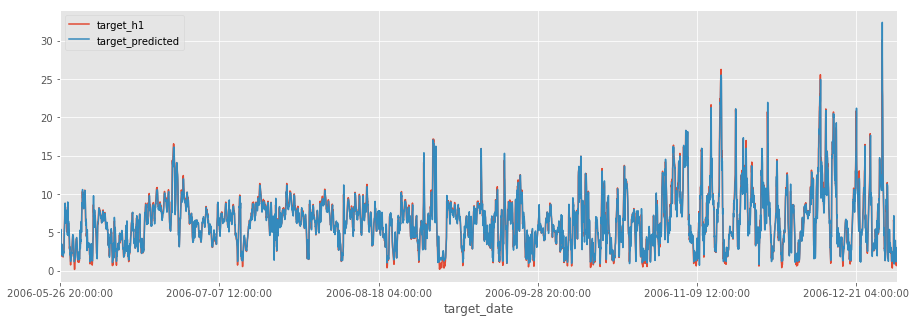

In [57]:
df_prediction.iloc[:,-2:].plot(figsize=(15,5))

In [70]:
df_prediction.head()

,f_0,f_1,f_2,f_3,f_4,f_5,target_h1,target_predicted
target_date,,,,,,,,
2006-05-26 20:00:00,5.30,5.19,5.24,5.27,4.45,3.92,4.19,3.741346
2006-05-26 21:00:00,5.19,5.24,5.27,4.45,3.92,4.19,4.60,4.337496
2006-05-26 22:00:00,5.24,5.27,4.45,3.92,4.19,4.60,5.34,4.733466
2006-05-26 23:00:00,5.27,4.45,3.92,4.19,4.60,5.34,4.70,5.397212
2006-05-27 00:00:00,4.45,3.92,4.19,4.60,5.34,4.70,3.00,4.840327


In [75]:
df_prediction['mse_h1'] = np.power(df_prediction.target_h1 -
                                   df_prediction.target_predicted, 2)

In [78]:
df_prediction['mae_h1'] = np.abs(df_prediction.target_h1 - 
                                 df_prediction.target_predicted)

In [79]:
# write on disk
df_prediction.head()

,f_0,f_1,f_2,f_3,f_4,f_5,target_h1,target_predicted,mse_h1,mae_h1
target_date,,,,,,,,,,
2006-05-26 20:00:00,5.30,5.19,5.24,5.27,4.45,3.92,4.19,3.741346,0.201290,0.448654
2006-05-26 21:00:00,5.19,5.24,5.27,4.45,3.92,4.19,4.60,4.337496,0.068908,0.262504
2006-05-26 22:00:00,5.24,5.27,4.45,3.92,4.19,4.60,5.34,4.733466,0.367883,0.606534
2006-05-26 23:00:00,5.27,4.45,3.92,4.19,4.60,5.34,4.70,5.397212,0.486105,0.697212
2006-05-27 00:00:00,4.45,3.92,4.19,4.60,5.34,4.70,3.00,4.840327,3.386803,1.840327


In [82]:
test_mse = df_prediction.mse_h1.sum() / len(df_prediction.mse_h1)
test_mse

0.9597418274494136

In [84]:
test_mae = df_prediction.mae_h1.sum() / len(df_prediction.mae_h1)
test_mae

0.6129641344792035